### Student Information
Name:王品翰

Student ID:111034026

GitHub ID:hanswang64

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

set up and check dataset

In [1]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math

import PAMI
import umap


file_path = './newdataset/Reddit-stock-sentiment.csv'  # 調整路徑到你的檔案
df = pd.read_csv(file_path)


# 看前幾筆
df.head()


type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   
3  https://www.reddit.com/r/stockstobuytoday/comm...       30        0.0   
4  https://edition.cnn.com/2025/04/10/politics/tr...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1           NaN  Stunt as in like why did they even make a big ...   
2           NaN                  Seeing lots of red in the ticker.   
3          0.98  Vision Marine Technologies Inc. is rewriting t...   
4           NaN                           He didn’t say thank you.   

   subjectivity  polarity  sentiment  \
0      1.000000 -0.900000       -1.0   
1      0.177778  0.083333        1.0   
2      0.000000  0.000000        0.0   
3      0.646970  0.216383        1.0   
4      0.000000  0.000000        0.0   

                                            entities  label  
0                                                 []   -1.0  
1              ['Stunt', 'company', 'deal', 'place']    0.0  
2                                         ['ticker']    0.0  
3  ['watercraft', 'skill', 'power', ']', 'feat', ...    1.0  
4                                                 []   -1.0

In [2]:
for i, row in df.head(3).iterrows():
    print(f"Title: {row['title']}")
    print(f"Text: {row['text']}\n")

Title: Retardation is on the menu boys! WSB is so back
Text: Calls on retards

Title: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

Title: How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Text: Seeing lots of red in the ticker.



In [3]:
df[df["subreddit"]=="StockMarket"][::10][0:5]

type             datetime  post_id    subreddit  \
2    comment  2025-04-10 15:09:41  mmeevio  StockMarket   
62   comment  2025-04-11 16:11:48  mml28yw  StockMarket   
94   comment  2025-04-11 15:15:20  mmkqpao  StockMarket   
113  comment  2025-04-11 10:04:54  mmjdl3n  StockMarket   
146  comment  2025-04-11 14:46:24  mmkku1z  StockMarket   

                                                 title               author  \
2    How do you feel about a sitting president maki...         Btankersly66   
62   The Trump administration is begging Xi Jinping...       FumblersUnited   
94   Trump: We Are Doing Really Well On Our Tariff ...       AKACharlieRock   
113  🚨China responds to Trump’s 145% tariff with an...  Appropriate-Dog6645   
146                     $ U.S. dollar value (crashing)           -Lysergian   

                                                   url  upvotes  downvotes  \
2    https://apnews.com/article/trump-truth-social-...        1        NaN   
62   https://edition.cnn.com/2025/04/10/politics/tr...        1        NaN   
94                 https://i.redd.it/uajqu4kxl7ue1.png        1        NaN   
113               https://i.redd.it/2f7y4h6226ue1.jpeg        2        NaN   
146               https://i.redd.it/atvlo83gk4ue1.jpeg        1        NaN   

     upvote_ratio                                               text  \
2             NaN                  Seeing lots of red in the ticker.   
62            NaN                                    Comedy gold :))   
94            NaN            I can’t take four years of lying. Help!   
113           NaN  \r\nAn evil man will burn his own nation to th...   
146           NaN  He reached this level only because of his inhe...   

     subjectivity  polarity  sentiment  \
2            0.00      0.00        0.0   
62           1.00      0.50        1.0   
94           0.00      0.00        0.0   
113          1.00     -1.00       -1.0   
146          0.25      0.25        1.0   

                                              entities  label  
2                                           ['ticker']    0.0  
62                                  ['Comedy', 'gold']   -1.0  
94                                            ['Help']    0.0  
113          ['Sun', 'man', 'ground', 'nation', 'Tzu']    0.0  
146  ['reason', 'pauper', 'level', 'everything', 'i...   -1.0

check and fix missing value


In [4]:
# check missing values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda df: dmh.check_missing_values(df),axis =1)



0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [5]:
df.isnull().apply(lambda df: dmh.check_missing_values(df))

type                            datetime  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              post_id                           subreddit  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                title                              author  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                  url                             upvotes  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            downvotes                        upvote_ratio  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                 783                                 783   

                                 text                        subjectivity  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             polarity                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             entities                               label  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [6]:


# 將 upvotes 負值轉成正值
df['upvotes'] = df['upvotes'].abs()

# 將缺失的 downvotes 視為 0
df['downvotes'] = df['downvotes'].fillna(0)

# 計算 upvote_ratio
df['upvote_ratio'] = df['upvotes'] / (df['upvotes'] + df['downvotes'])

# 若分母為 0（即 upvotes=0 且 downvotes=0），可以設為 NaN 或 0
df['upvote_ratio'] = df['upvote_ratio'].fillna(0)

# 看前幾筆結果
df[['upvotes', 'downvotes', 'upvote_ratio']].head()


upvotes  downvotes  upvote_ratio
0        0        0.0           0.0
1       15        0.0           1.0
2        1        0.0           1.0
3       30        0.0           1.0
4        1        0.0           1.0

In [7]:
df.isnull().apply(lambda df: dmh.check_missing_values(df))

type                            datetime  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              post_id                           subreddit  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                title                              author  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                  url                             upvotes  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            downvotes                        upvote_ratio  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                 text                        subjectivity  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             polarity                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             entities                               label  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [8]:

sum(df.duplicated('text'))

23

In [9]:
len(df)


847

In [10]:
# 找出 text 欄位重複的資料
duplicates = df[df.duplicated('text', keep=False)]
print(duplicates)

        type             datetime  post_id         subreddit  \
34   comment  2021-02-01 13:45:52  gllif2v            stocks   
42   comment  2021-02-01 13:45:17  gllicpw            stocks   
70      post  2025-03-29 18:14:28  1jmshlc  stockstobuytoday   
105     post   2025-04-04 9:01:07  1jr7fe1  stockstobuytoday   
159     post  2025-04-11 13:54:31  1jwqgce  stockstobuytoday   
160     post  2025-04-03 12:18:32  1jqgwyz  stockstobuytoday   
179     post  2025-03-25 15:47:42  1jjmipo  stockstobuytoday   
192     post  2025-03-21 21:15:20  1jgrs02  stockstobuytoday   
284     post  2025-04-06 16:00:59  1jsxft7  stockstobuytoday   
349     post  2025-03-22 18:14:30  1jhestv  stockstobuytoday   
352     post  2025-04-08 12:18:30  1juc5fs  stockstobuytoday   
387     post  2025-03-24 15:47:30  1jituo3  stockstobuytoday   
409     post  2025-03-25 12:30:39  1jji7cr  stockstobuytoday   
421     post  2025-03-31 14:05:30  1jo3zpc  stockstobuytoday   
432     post  2025-04-11 16:01:14  1jwte

In [11]:


# 先確保 text 是純文字
df['text'] = df['text'].astype(str)

# 只針對重複的 text 去挑最大 upvote
mask = df.duplicated('text', keep=False)
df_dup = df[mask].copy()
df_unique = df[~mask].copy()

# 對重複的 text 保留 upvotes 最大的那筆
df_dup = df_dup.loc[df_dup.groupby('text')['upvotes'].idxmax()]

# 合併回去
df = pd.concat([df_unique, df_dup]).reset_index(drop=True)

In [12]:
len(df)

824

In [13]:

sum(df.duplicated('text'))

0

set up sample and see the comparisoin 

In [14]:
df_sample = df.sample(n=300) #random state
df_sample[0:4]

type             datetime  post_id         subreddit  \
743  comment  2021-02-01 20:34:29  gln938x            stocks   
646  comment  2024-12-28 13:24:27  m46tcuc  stockstobuytoday   
161     post  2021-12-08 19:36:14   rbz3ha  stockstobuytoday   
231  comment  2025-04-11 13:24:23  mmk508z       StockMarket   

                                                 title                author  \
743  It's fucking awful seeing the "Silver" misinfo...            Billib2002   
646   $ARTW Could be the next big runner in small caps  Quiet_Reputation_128   
161                    $PPSI short squeeze 43% shorted               saasfin   
231  Trump is surrounded by a bunch of idiots, he s...             autfaciam   

                                                   url  upvotes  downvotes  \
743  https://www.reddit.com/r/stocks/comments/la34b...        2        0.0   
646  https://www.reddit.com/r/stockstobuytoday/comm...        2        0.0   
161  https://www.reddit.com/r/stockstobuytoday/comm...       11        0.0   
231                https://i.redd.it/c2mmpy3qf7ue1.png        1        0.0   

     upvote_ratio                                               text  \
743           1.0  Even in Greek apps of all places they've been ...   
646           1.0  The agriculture sector should boom under this ...   
161           1.0                                      Happening now   
231           1.0  And himself along maybe? At least nobody can b...   

     subjectivity  polarity  sentiment  \
743           0.5       0.3        1.0   
646           0.0       0.0        0.0   
161           0.0       0.0        0.0   
231           0.7      -0.4       -1.0   

                                              entities  label  
743                          ['lmao', 'Greek', 'apps']    0.0  
646  ['gem', 'sector', 'administration', 'agricultu...    1.0  
161                                                 []    0.0  
231                                  ['nobody', 'tan']   -1.0

In [15]:
# 比較資料量
print("原始資料列數:", df.shape[0])
print("抽樣後資料列數:", df_sample.shape[0])

# 查看前幾列
print(df_sample.head())

# 查看索引是否保留原索引
print(df_sample.index)

# 取得 category 統計摘要並加上後綴
desc_X = df.describe().add_suffix('_原始')
desc_sample = df_sample.describe().add_suffix('_抽樣')

# 合併
compare = pd.concat([desc_X, desc_sample], axis=1)
compare


原始資料列數: 824
抽樣後資料列數: 300
        type             datetime  post_id         subreddit  \
743  comment  2021-02-01 20:34:29  gln938x            stocks   
646  comment  2024-12-28 13:24:27  m46tcuc  stockstobuytoday   
161     post  2021-12-08 19:36:14   rbz3ha  stockstobuytoday   
231  comment  2025-04-11 13:24:23  mmk508z       StockMarket   
123  comment  2025-04-10 14:58:26  mmeclq6       StockMarket   

                                                 title                author  \
743  It's fucking awful seeing the "Silver" misinfo...            Billib2002   
646   $ARTW Could be the next big runner in small caps  Quiet_Reputation_128   
161                    $PPSI short squeeze 43% shorted               saasfin   
231  Trump is surrounded by a bunch of idiots, he s...             autfaciam   
123  How do you feel about a sitting president maki...           Anyawnomous   

                                                   url  upvotes  downvotes  \
743  https://www.reddit.com/r/s

upvotes_原始  downvotes_原始  upvote_ratio_原始  subjectivity_原始  \
count   824.000000    824.000000       824.000000       824.000000   
mean     13.057039      0.020631         0.971858         0.353902   
std     144.043172      0.410449         0.164839         0.317379   
min       0.000000      0.000000         0.000000         0.000000   
25%       1.000000      0.000000         1.000000         0.000000   
50%       1.000000      0.000000         1.000000         0.374802   
75%       4.000000      0.000000         1.000000         0.590833   
max    3943.000000     11.000000         1.000000         1.000000   

       polarity_原始  sentiment_原始    label_原始   upvotes_抽樣  downvotes_抽樣  \
count   824.000000    824.000000  824.000000   300.000000    300.000000   
mean      0.037746      0.145631   -0.251214    22.520000      0.053333   
std       0.300796      0.775165    0.671408   236.127048      0.677263   
min      -1.000000     -1.000000   -1.000000     0.000000      0.000000   
25%       0.000000      0.000000   -1.000000     1.000000      0.000000   
50%       0.000000      0.000000    0.000000     1.000000      0.000000   
75%       0.160000      1.000000    0.000000     4.000000      0.000000   
max       1.000000      1.000000    1.000000  3943.000000     11.000000   

       upvote_ratio_抽樣  subjectivity_抽樣  polarity_抽樣  sentiment_抽樣    label_抽樣  
count       300.000000       300.000000   300.000000     300.00000  300.000000  
mean          0.973073         0.369288     0.042264       0.14000   -0.223333  
std           0.161362         0.315172     0.323746       0.78472    0.684361  
min           0.000000         0.000000    -1.000000      -1.00000   -1.000000  
25%           1.000000         0.000000     0.000000       0.00000   -1.000000  
50%           1.000000         0.400000     0.000000       0.00000    0.000000  
75%           1.000000         0.600000     0.177500       1.00000    0.000000  
max           1.000000         1.000000     1.000000       1.00000    1.000000

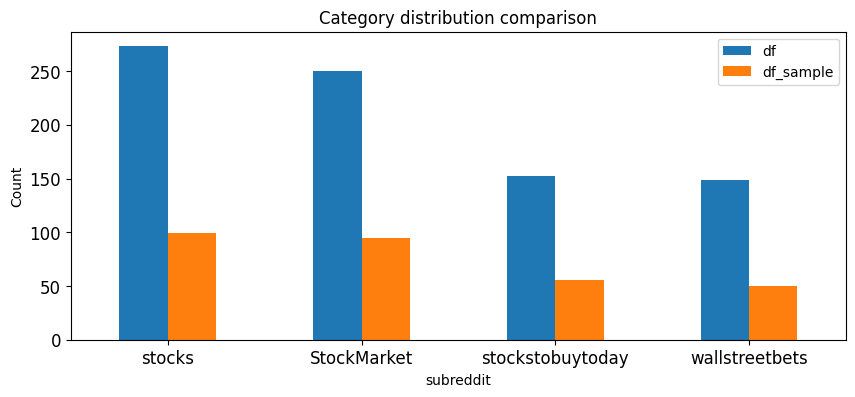

In [16]:
import matplotlib.pyplot as plt

categories = ['stockstobuytoday' 'stocks' 'wallstreetbets' 'StockMarket']
# 計算每個 category 的數量
count_df_sample = df_sample['subreddit'].value_counts()
count_df = df['subreddit'].value_counts()

# 將兩個 Series 合併成 DataFrame
df_counts = pd.DataFrame({ 'df': count_df,'df_sample': count_df_sample}).fillna(0)

# 畫群組直條圖
df_counts.plot(kind='bar', figsize=(10,4), fontsize=12, rot=0, title='Category distribution comparison')
plt.ylabel('Count')
plt.show()

Feature creation



In [17]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')     # 用於停用詞過濾
nltk.download('averaged_perceptron_tagger')  # 用於詞性標註（如果 tokenize_text 有用到）

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hansw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
df['unigrams'] = df['text'].apply(lambda df: dmh.tokenize_text(df))
df.head()["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

Feature subset selection

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [20]:
analyze = count_vect.build_analyzer()
print(df.text[0])
analyze(df.text[0])

Calls on retards


['calls', 'on', 'retards']

In [21]:
df_counts.shape

(824, 4346)

In [22]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [23]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [24]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [25]:
vocab = count_vect.get_feature_names_out()
record_5 = df_counts[4]
indices = record_5.nonzero()[1]
words = [vocab[i] for i in indices]
print(words)

['he', 'didn', 'say', 'thank', 'you']


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 只取前 20 筆資料
df_small = df.head(20)

# 建立 CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_small['text'])


In [27]:
# 前 20 個詞
plot_x = count_vect.get_feature_names_out()[0:20]

# 前 20 個文件索引
plot_y = ["doc_"+ str(i) for i in df_small.index]

# 前 20x20 的矩陣
plot_z = X_counts[0:20, 0:20].toarray()

# 轉成 DataFrame 方便 seaborn 畫圖
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)


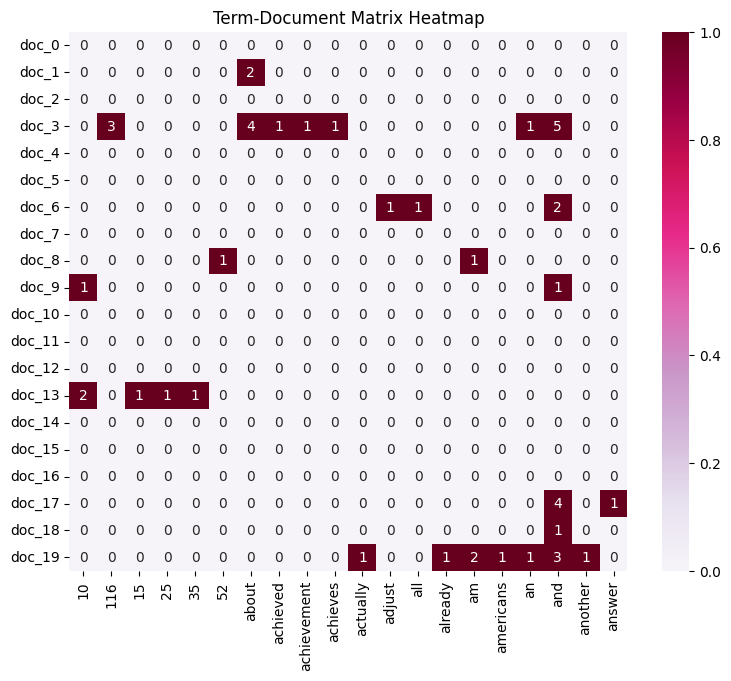

In [28]:
plt.figure(figsize=(9,7))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title("Term-Document Matrix Heatmap")
plt.show()


Transform text data

In [29]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [30]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

np.int64(3)

C:\Users\hansw\AppData\Local\Temp\ipykernel_10480\1447429508.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


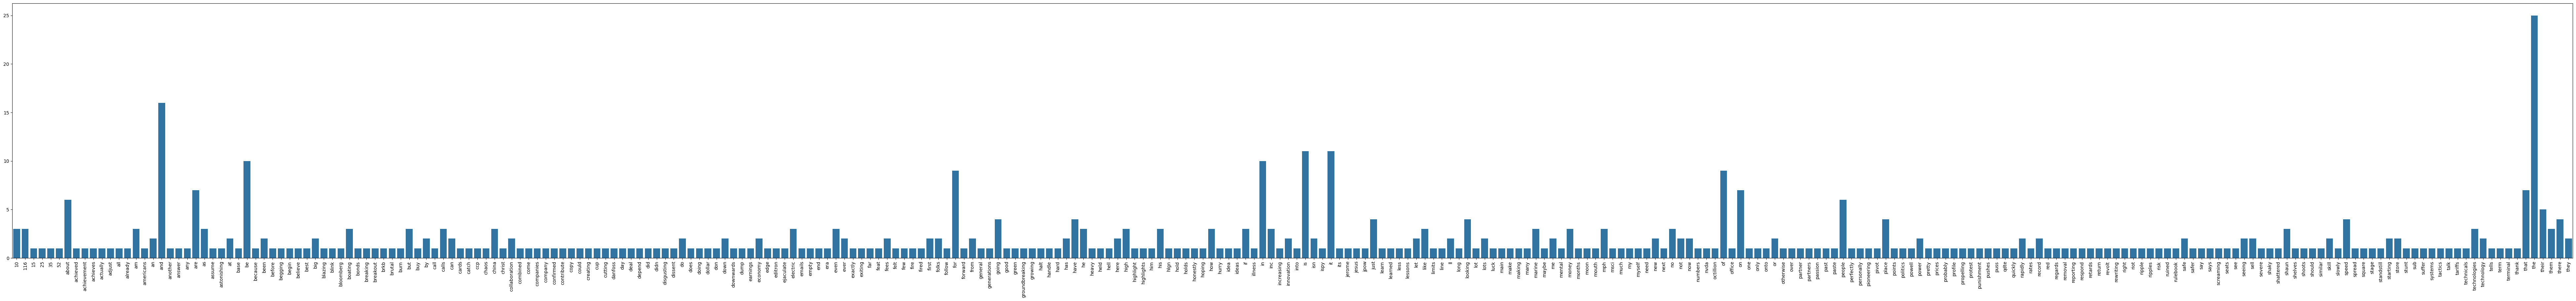

In [31]:
import seaborn as sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\hansw\AppData\Local\Temp\ipykernel_10480\1632463425.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms, y=top_counts, palette="viridis")


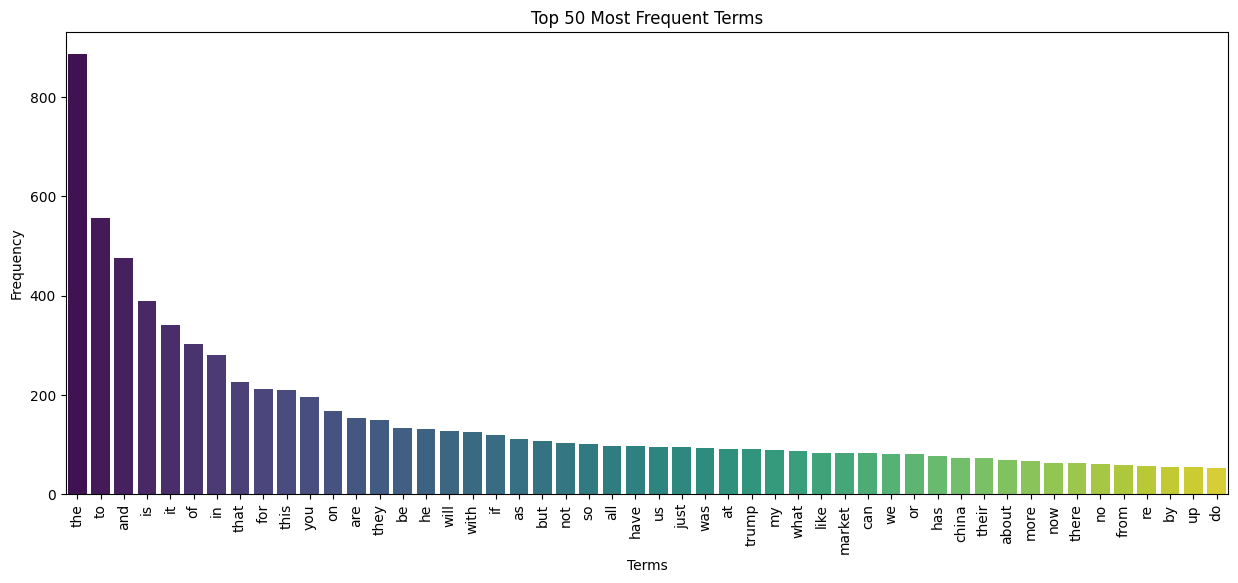

C:\Users\hansw\AppData\Local\Temp\ipykernel_10480\1632463425.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_var_terms, y=top_var_counts, palette="magma")


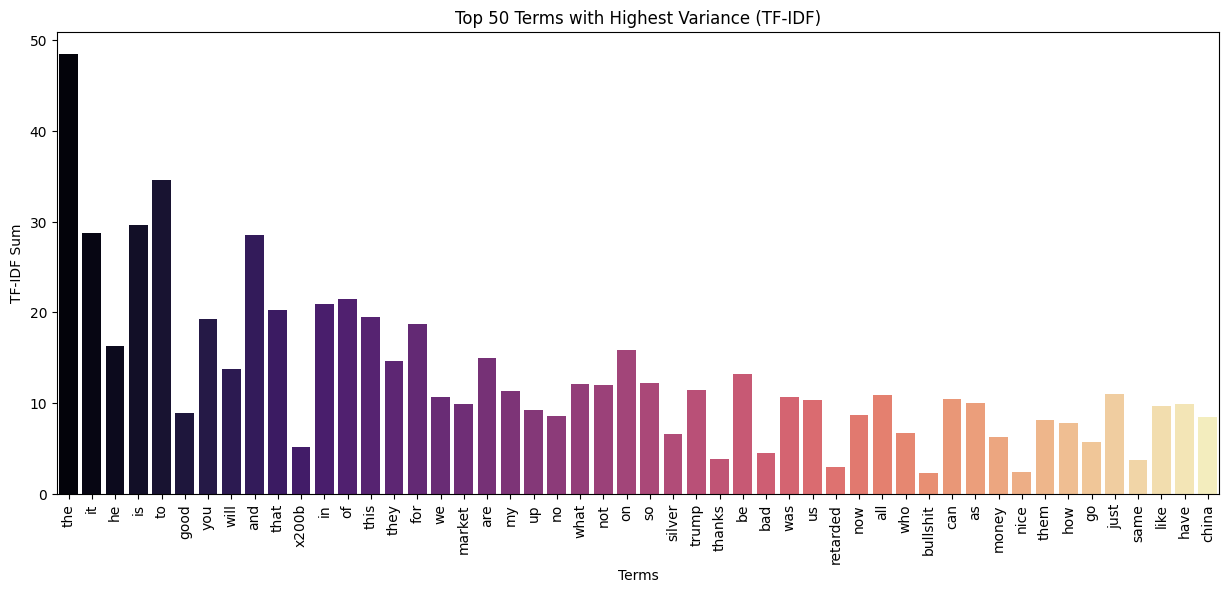

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1️⃣ 前 50 個最常出現的詞（用 CountVectorizer 計算頻率）
# -----------------------------
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(df['text'])
term_frequencies = np.array(X_count.sum(axis=0)).flatten()

top_n = 50
top_indices = term_frequencies.argsort()[::-1][:top_n]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_counts = term_frequencies[top_indices]

plt.figure(figsize=(15,6))
sns.barplot(x=top_terms, y=top_counts, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 50 Most Frequent Terms")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()


# -----------------------------
# 2️⃣ 變異數最高的 50 個詞（用 TF-IDF 計算）
# -----------------------------
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])

# 計算每個特徵的變異數
term_variances = X_tfidf.toarray().var(axis=0)
top_var_indices = term_variances.argsort()[::-1][:50]

# 用 TF-IDF 的特徵名稱
top_var_terms = tfidf_vect.get_feature_names_out()[top_var_indices]

# 用 TF-IDF 總和當 y 值
top_var_counts = X_tfidf.toarray()[:, top_var_indices].sum(axis=0)

plt.figure(figsize=(15,6))
sns.barplot(x=top_var_terms, y=top_var_counts, palette="magma")
plt.xticks(rotation=90)
plt.title("Top 50 Terms with Highest Variance (TF-IDF)")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Sum")
plt.show()



In [33]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\hansw\AppData\Local\Temp\ipykernel_10480\2166548998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


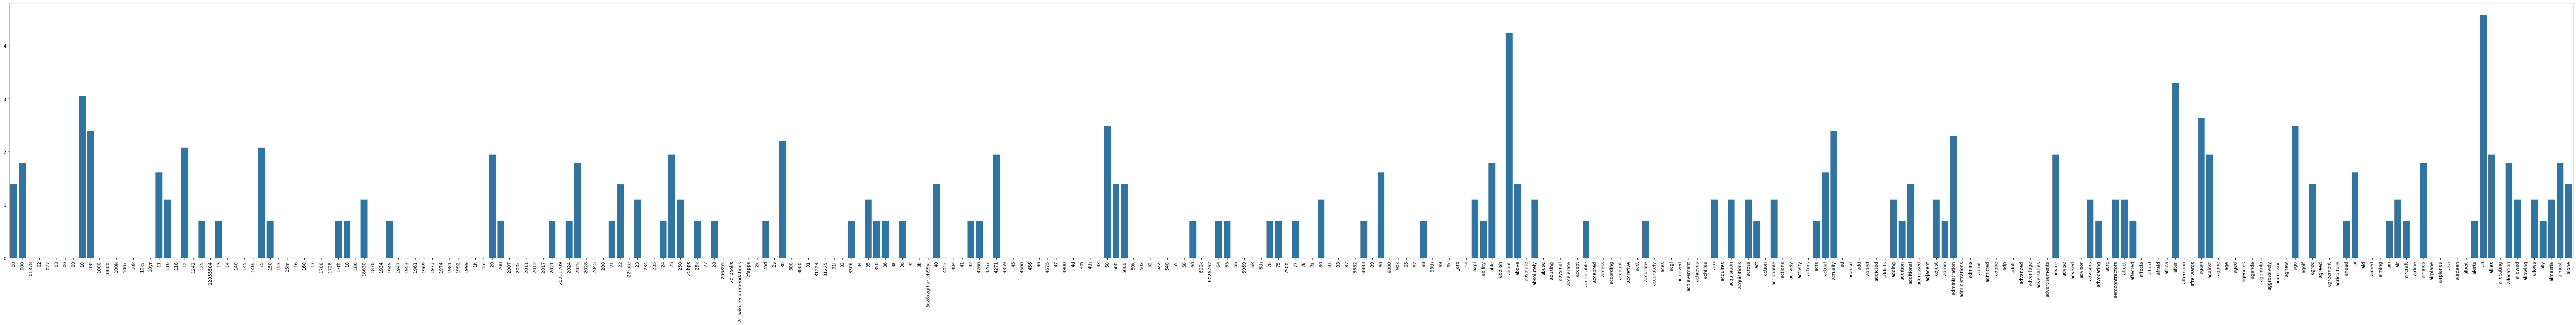

In [34]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\hansw\AppData\Local\Temp\ipykernel_10480\594430624.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='term', y='count_log', data=df_log_sorted, palette='coolwarm')


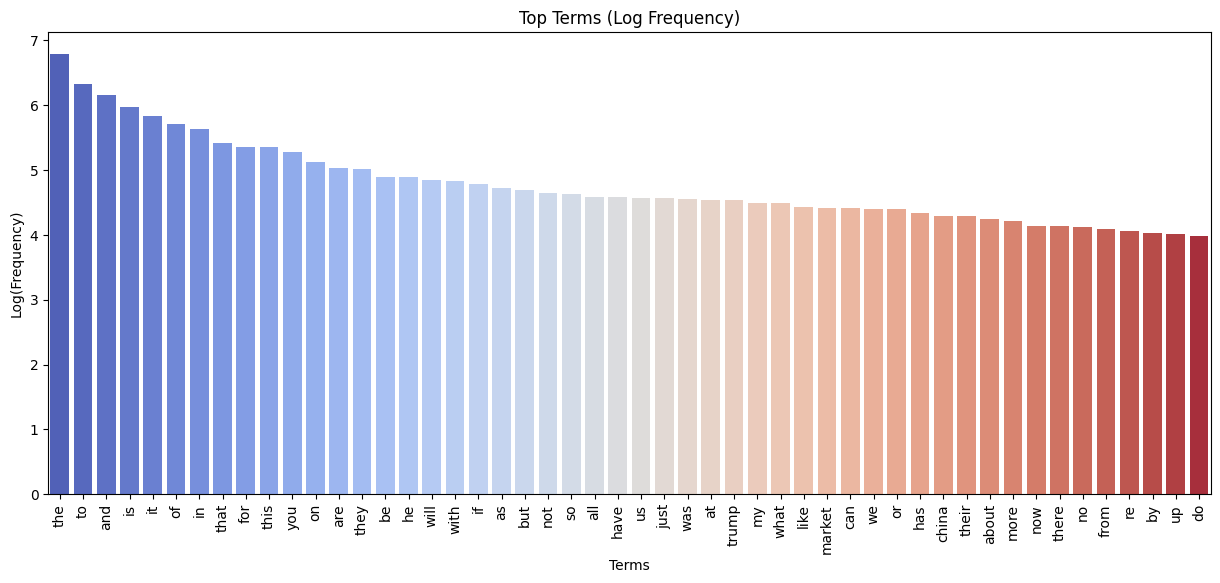

In [35]:


# 假設 top_terms 和 top_counts 已經定義
term_frequencies_log = np.log1p(top_counts)  # log1p = log(1 + x)

# 建立 DataFrame 並排序
df_log = pd.DataFrame({
    'term': top_terms,
    'count_log': term_frequencies_log
})
df_log_sorted = df_log.sort_values(by='count_log', ascending=False)

# 畫圖
plt.figure(figsize=(15,6))
sns.barplot(x='term', y='count_log', data=df_log_sorted, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Top Terms (Log Frequency)")
plt.xlabel("Terms")
plt.ylabel("Log(Frequency)")
plt.show()


new data visualizations

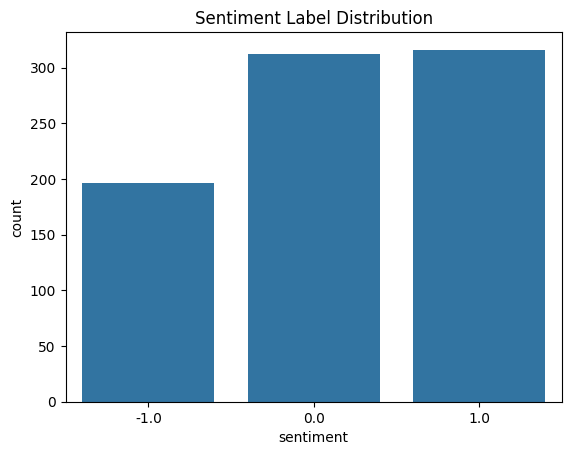

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Label Distribution")
plt.show()


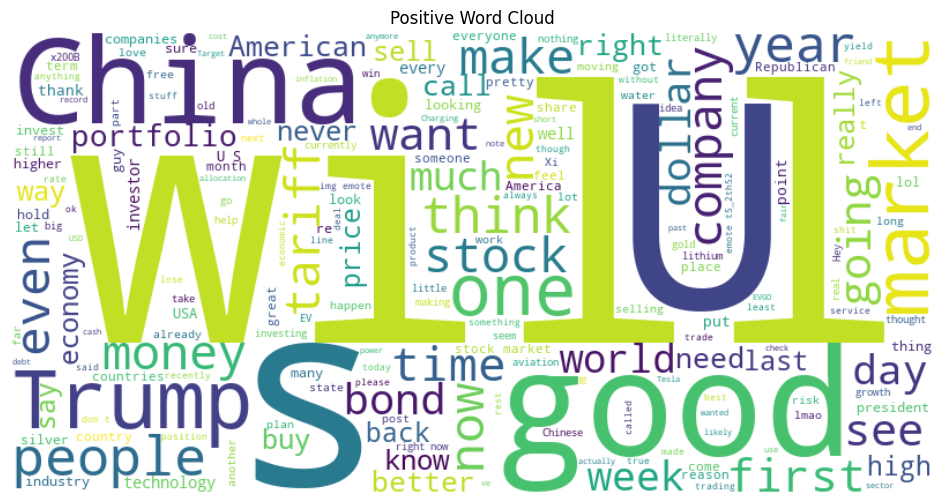

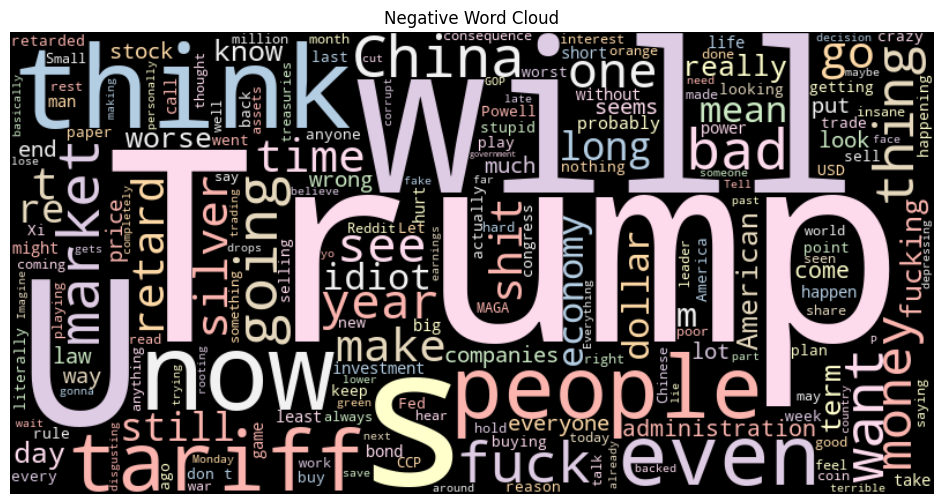

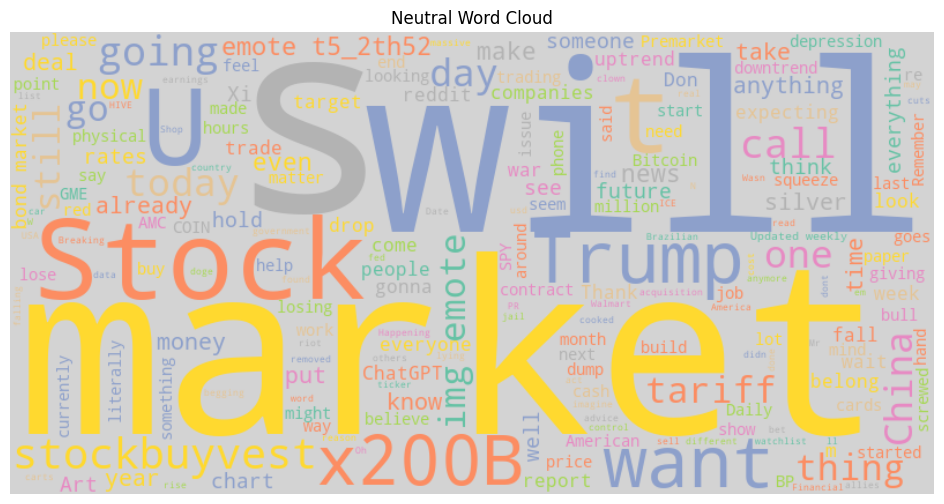

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 先把 NaN 填成空字串
df['text'] = df['text'].fillna('')

# 文字分類
positive_text = " ".join(df[df['sentiment']==1.0]['text'])
negative_text = " ".join(df[df['sentiment']==-1.0]['text'])
neutral_text  = " ".join(df[df['sentiment']==0]['text'])

# 生成 WordCloud
def plot_wordcloud(text, title, bg_color='white', colormap=None):
    if not text.strip():
        print(f"No words for {title}")
        return
    wc = WordCloud(width=800, height=400, background_color=bg_color, colormap=colormap).generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(positive_text, "Positive Word Cloud", bg_color='white')
plot_wordcloud(negative_text, "Negative Word Cloud", bg_color='black', colormap='Pastel1')
plot_wordcloud(neutral_text, "Neutral Word Cloud", bg_color='lightgrey', colormap='Set2')


C:\Users\hansw\AppData\Local\Temp\ipykernel_10480\1611717989.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


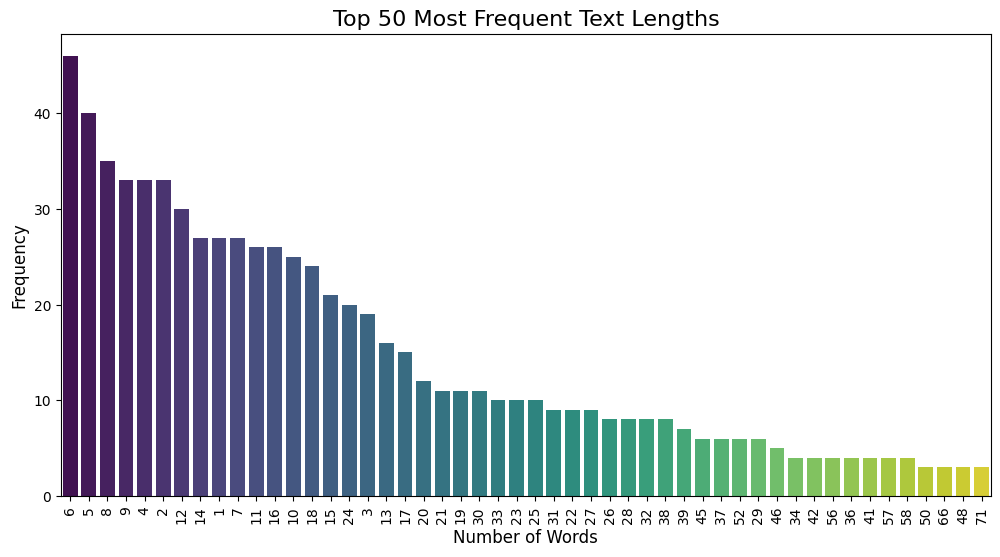

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# 新增一欄 text_len 表示每筆文字的字數
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))

# 計算文字長度頻率
length_counts = df['text_len'].value_counts()  # 頻率
top_n = 50
length_counts_top = length_counts.head(top_n)  # 取前 50 頻率最高

plt.figure(figsize=(12,6))
sns.barplot(
    x=length_counts_top.index, 
    y=length_counts_top.values, 
    palette='viridis',
    order=length_counts_top.index  # 按頻率高到低排列
)
plt.title("Top 50 Most Frequent Text Lengths", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90)
plt.show()


# Phase 2

finding frequent pattern

In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# 假設你的資料在 df
categories = df['subreddit'].unique()  # 取得所有 subreddit

# 建立每個 subreddit 的 DataFrame
category_dfs = {cat: df[df['subreddit'] == cat].copy() for cat in categories}

# 將文字轉為 term-document 矩陣
def create_term_document_df(df, text_column='text'):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df[text_column])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df

# 建立每個 subreddit 的 term-document 矩陣
filt_term_document_dfs = {cat: create_term_document_df(category_dfs[cat]) for cat in categories}

# 篩選 top 5% 最常見字詞與 bottom 1% 最少見字詞，並印出資訊
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    return term_document_df.drop(columns=words_to_remove)

# 套用篩選到每個 subreddit
term_document_dfs = {}
for i, category in enumerate(categories):
    print(f"========== Category {i}: {category} ==========")
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])




========== Category 0: wallstreetbets ==========
Bottom 1.0% words: 
31224    1
31225    1
350      1
1981     1
1m       1
20       1
200k     1
2012     1
2021     1
dtype: int64
Top 5.0% words: 
market       8
still        8
with         8
time         8
re           8
she          8
make         8
up           9
good         9
no           9
puts         9
what         9
there        9
about        9
we          10
not         10
now         10
be          10
will        10
target      10
was         11
all         11
over        11
have        12
are         12
at          14
just        15
can         15
but         15
like        16
so          17
img         18
emote       18
t5_2th52    18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64
========== Category 1: StockMarket ==========
Bottom 1.0% words: 
194

DenseFormatDF

In [42]:
from PAMI.extras.convert.DF2DB import DF2DB

# 將每個 subreddit 的 term-document matrix 轉成 transactional database
for subreddit in term_document_dfs:
    # 取代名稱中的句點，避免檔案命名錯誤
    subreddit_safe = subreddit.replace('.', '_')
    
    print(f"Converting {subreddit} → td_freq_db_{subreddit_safe}.csv ...")
    
    # 建立 DF2DB 物件
    obj = DF2DB(term_document_dfs[subreddit])
    
    # 轉換為 transactional database（項目出現次數 ≥ 1）
    obj.convert2TransactionalDatabase(f'td_freq_db_{subreddit_safe}.csv', '>=', 1)

print("\n✅ All subreddit transactional databases have been successfully generated!")


Converting wallstreetbets → td_freq_db_wallstreetbets.csv ...
Converting StockMarket → td_freq_db_StockMarket.csv ...
Converting stockstobuytoday → td_freq_db_stockstobuytoday.csv ...
Converting stocks → td_freq_db_stocks.csv ...

✅ All subreddit transactional databases have been successfully generated!



📊 Analyzing transactional database: td_freq_db_wallstreetbets.csv
Database size (total no of transactions) : 145
Number of items : 915
Minimum Transaction Size : 1
Average Transaction Size : 9.379310344827585
Maximum Transaction Size : 64
Standard Deviation Transaction Size : 9.441704233596845
Variance in Transaction Sizes : 89.76484674329502
Sparsity : 0.9897493876012813


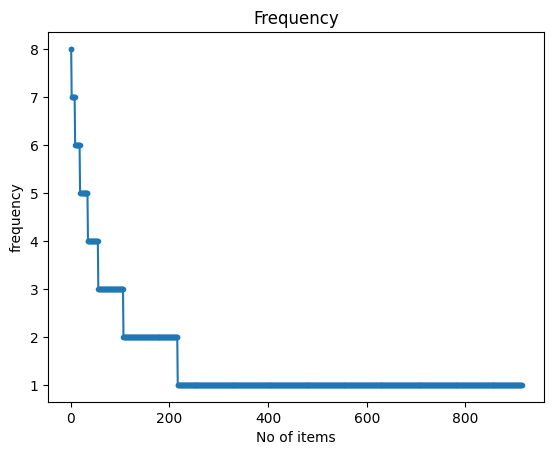

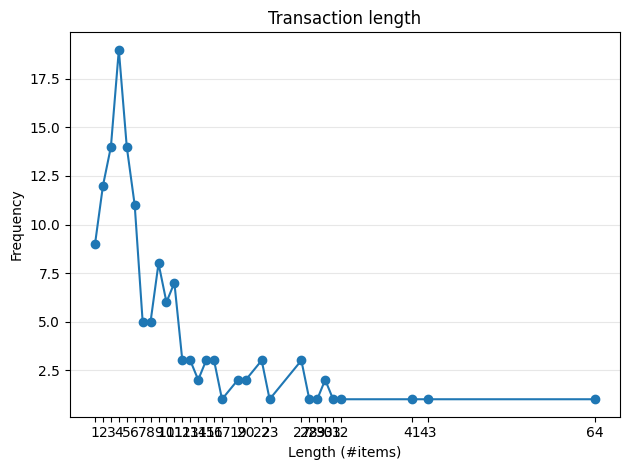


📊 Analyzing transactional database: td_freq_db_StockMarket.csv
Database size (total no of transactions) : 248
Number of items : 1499
Minimum Transaction Size : 1
Average Transaction Size : 10.149193548387096
Maximum Transaction Size : 145
Standard Deviation Transaction Size : 12.355206529309571
Variance in Transaction Sizes : 153.2691491445736
Sparsity : 0.9932293572058792


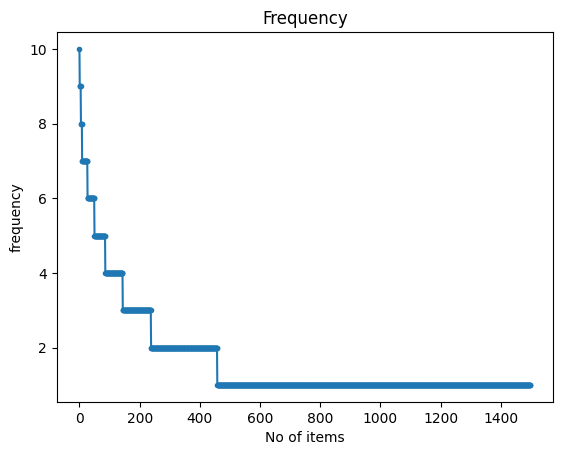

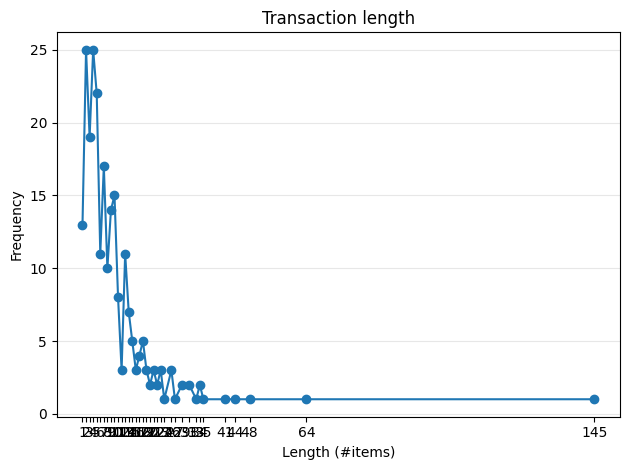


📊 Analyzing transactional database: td_freq_db_stockstobuytoday.csv
Database size (total no of transactions) : 150
Number of items : 1522
Minimum Transaction Size : 1
Average Transaction Size : 14.653333333333334
Maximum Transaction Size : 217
Standard Deviation Transaction Size : 26.93696015184754
Variance in Transaction Sizes : 730.4696196868009
Sparsity : 0.9903723171265878


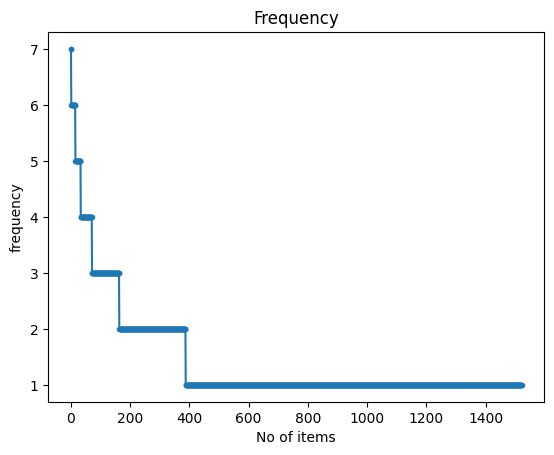

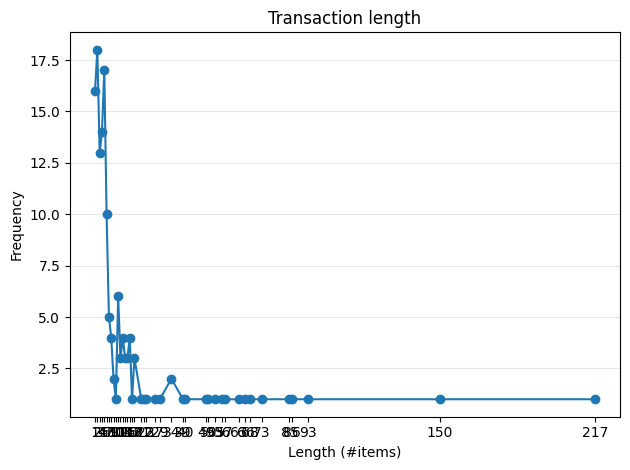


📊 Analyzing transactional database: td_freq_db_stocks.csv
Database size (total no of transactions) : 273
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.326007326007327
Maximum Transaction Size : 164
Standard Deviation Transaction Size : 16.976603739698493
Variance in Transaction Sizes : 289.26465201465203
Sparsity : 0.9935058896980927


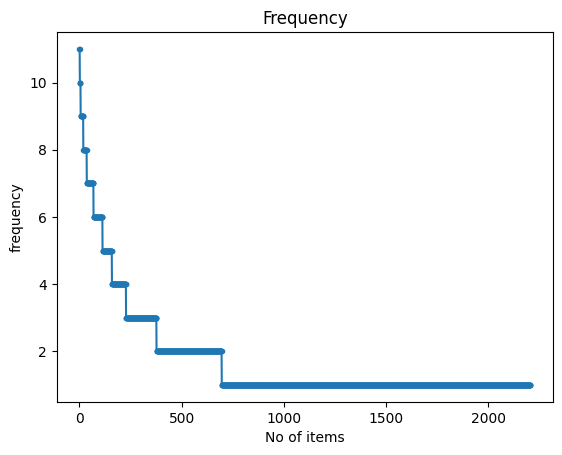

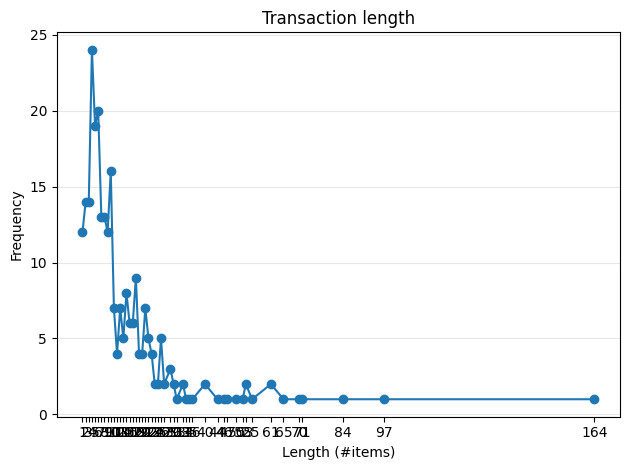


✅ All available subreddit databases analyzed successfully!


In [43]:
import os
from PAMI.extras.dbStats import TransactionalDatabase as tds

# 針對每個 subreddit 檔案進行統計與繪圖
for subreddit in term_document_dfs:
    subreddit_safe = subreddit.replace('.', '_')
    filename = f'td_freq_db_{subreddit_safe}.csv'
    
    if os.path.exists(filename):
        print(f"\n📊 Analyzing transactional database: {filename}")
        obj = tds.TransactionalDatabase(filename)
        obj.run()
        obj.printStats()
        obj.plotGraphs()
    else:
        print(f"⚠️ File not found, skipping: {filename}")

print("\n✅ All available subreddit databases analyzed successfully!")


finding frequent pattern

In [45]:
# Frequent Pattern Mining for All Subreddits (Detailed Version)

from PAMI.frequentPattern.basic import FPGrowth as alg
import pandas as pd
import os

# === 1️⃣ 設定最小支援度 ===
minSup = 9

# === 2️⃣ 建立字典來儲存各 subreddit 的結果 ===
frequentPatternsDFs = {}

# === 3️⃣ 對每個 subreddit 執行 FP-Growth ===
for subreddit in term_document_dfs.keys():
    subreddit_safe = subreddit.replace('.', '_')  # 避免檔名出錯
    input_file = f'td_freq_db_{subreddit_safe}.csv'
    
    if not os.path.exists(input_file):
        print(f"⚠️ Skipping {subreddit} (file not found: {input_file})")
        continue

    print(f"\n==============================")
    print(f"🚀 Mining frequent patterns for subreddit: {subreddit}")
    print(f"==============================")

    # === 4️⃣ 執行 FP-Growth 演算法 ===
    obj = alg.FPGrowth(iFile=input_file, minSup=minSup)
    obj.mine()

    # === 5️⃣ 將結果轉為 DataFrame ===
    frequentPatternsDF = obj.getPatternsAsDataFrame()
    frequentPatternsDFs[subreddit] = frequentPatternsDF

    # === 6️⃣ 輸出結果資訊 ===
    print("Frequent patterns were generated successfully using FP-Growth algorithm")
    print("Total No of patterns: " + str(len(frequentPatternsDF)))
    print("Runtime: " + str(obj.getRuntime()))
    
    # === 7️⃣ 儲存結果 ===
    output_file = f'freq_patterns_{subreddit_safe}_minSup{minSup}.txt'
    obj.save(output_file)
    print(f"Patterns saved successfully to file: {output_file}")

print("\n🎯 All subreddit frequent pattern mining completed successfully!")

# === 8️⃣ 檢查範例輸出（例如顯示第一個 subreddit 的前幾筆 pattern） ===
first_subreddit = list(frequentPatternsDFs.keys())[0]
print(f"\nExample preview of patterns from subreddit: {first_subreddit}")
print(frequentPatternsDFs[first_subreddit].head())



🚀 Mining frequent patterns for subreddit: wallstreetbets
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using FP-Growth algorithm
Total No of patterns: 0
Runtime: 0.0
Patterns saved successfully to file: freq_patterns_wallstreetbets_minSup9.txt

🚀 Mining frequent patterns for subreddit: StockMarket
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using FP-Growth algorithm
Total No of patterns: 5
Runtime: 0.004300594329833984
Patterns saved successfully to file: freq_patterns_StockMarket_minSup9.txt

🚀 Mining frequent patterns for subreddit: stockstobuytoday
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using FP-Growth algorithm
Total No of patterns: 0
Runtime: 0.0030155181884765625
Patterns saved successfully to file: freq_patterns_stockstob

FAE to Topk

In [46]:
from PAMI.frequentPattern.topk import FAE
import time
import pandas as pd

# 指定要分析的資料檔案
category = "comp.graphics"
iFile = f'td_freq_db_{category.replace(".", "_")}.csv'

# 用來存放結果的字典
fae_results = {}

# 依序測試不同 k 值
for k in [500, 1000, 1500]:
    print(f"\n========== Running FAE Top-K for '{category}' with k = {k} ==========")
    
    # 初始化並執行演算法
    obj_topk = FAE.FAE(iFile=iFile, k=k)
    start_time = time.time()
    obj_topk.mine()
    runtime = time.time() - start_time
    
    # 取得結果並轉成 DataFrame
    patterns_df = obj_topk.getPatternsAsDataFrame()
    fae_results[k] = {
        "patterns": patterns_df,
        "runtime": runtime
    }
    
    # 顯示摘要
    print(f"✅ Top-K frequent patterns successfully generated using FAE algorithm")
    print(f"Total patterns found: {len(patterns_df)}")
    print(f"Runtime: {runtime:.4f} seconds\n")
    
    # 儲存結果
    output_path = f'FAE_TopK_{category.replace(".", "_")}_k{k}.txt'
    obj_topk.save(output_path)
    print(f"Patterns saved to '{output_path}'")
    
    # 顯示前五筆 pattern
    display(patterns_df.head())



========== Running FAE Top-K for 'comp.graphics' with k = 500 ==========
 TopK frequent patterns were successfully generated using FAE algorithm.
✅ Top-K frequent patterns successfully generated using FAE algorithm
Total patterns found: 500
Runtime: 1.6394 seconds

Patterns saved to 'FAE_TopK_comp_graphics_k500.txt'


Patterns  Support
0     done       25
1     life       24
2    ideas       24
3     feel       24
4    tried       24


========== Running FAE Top-K for 'comp.graphics' with k = 1000 ==========
 TopK frequent patterns were successfully generated using FAE algorithm.
✅ Top-K frequent patterns successfully generated using FAE algorithm
Total patterns found: 1000
Runtime: 3.3902 seconds

Patterns saved to 'FAE_TopK_comp_graphics_k1000.txt'


Patterns  Support
0     done       25
1     life       24
2    ideas       24
3     feel       24
4    tried       24


========== Running FAE Top-K for 'comp.graphics' with k = 1500 ==========
 TopK frequent patterns were successfully generated using FAE algorithm.
✅ Top-K frequent patterns successfully generated using FAE algorithm
Total patterns found: 1500
Runtime: 7.5458 seconds

Patterns saved to 'FAE_TopK_comp_graphics_k1500.txt'


Patterns  Support
0     done       25
1     life       24
2    ideas       24
3     feel       24
4    tried       24

MaxFPGrowth

In [47]:
from PAMI.frequentPattern.maximal import MaxFPGrowth
import time
import pandas as pd

# 指定要分析的資料檔案
category = "comp.graphics"
iFile = f'td_freq_db_{category.replace(".", "_")}.csv'

# 儲存結果的字典
maxfp_results = {}

# 測試不同的最小支持度
for minSup in [3, 6, 9]:
    print(f"\n========== Running MaxFPGrowth for '{category}' with minSup = {minSup} ==========")
    
    # 初始化並執行演算法
    obj_maxfp = MaxFPGrowth.MaxFPGrowth(iFile=iFile, minSup=minSup)
    start_time = time.time()
    obj_maxfp.mine()
    runtime = time.time() - start_time
    
    # 取得結果 DataFrame
    patterns_df = obj_maxfp.getPatternsAsDataFrame()
    maxfp_results[minSup] = {
        "patterns": patterns_df,
        "runtime": runtime
    }
    
    # 顯示摘要
    print("✅ Maximal Frequent patterns successfully generated using MaxFp-Growth algorithm")
    print(f"Total patterns found: {len(patterns_df)}")
    print(f"Runtime: {runtime:.4f} seconds\n")
    
    # 儲存結果
    output_path = f'MaxFPGrowth_{category.replace(".", "_")}_minSup{minSup}.txt'
    obj_maxfp.save(output_path)
    print(f"Patterns saved to '{output_path}'")
    
    # 顯示前五筆 pattern
    display(patterns_df.head())



========== Running MaxFPGrowth for 'comp.graphics' with minSup = 3 ==========
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
✅ Maximal Frequent patterns successfully generated using MaxFp-Growth algorithm
Total patterns found: 6845
Runtime: 35.7539 seconds

Patterns saved to 'MaxFPGrowth_comp_graphics_minSup3.txt'


Patterns  Support
0  due bytes responsible 000 opinion 640x480 rob ...        3
1                                               bag         3
2                                       garbo uwasa         3
3          wrong 200 responsible 000 umn 480 640 tc         3
4                             responsible 000 essex         3


========== Running MaxFPGrowth for 'comp.graphics' with minSup = 6 ==========
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
✅ Maximal Frequent patterns successfully generated using MaxFp-Growth algorithm
Total patterns found: 1347
Runtime: 0.4755 seconds

Patterns saved to 'MaxFPGrowth_comp_graphics_minSup6.txt'


Patterns  Support
0                           tim brock         6
1                                face         6
2                              pardon         6
3  removal silent assassin cellar tsa         6
4                            creative         6


========== Running MaxFPGrowth for 'comp.graphics' with minSup = 9 ==========
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
✅ Maximal Frequent patterns successfully generated using MaxFp-Growth algorithm
Total patterns found: 660
Runtime: 0.2158 seconds

Patterns saved to 'MaxFPGrowth_comp_graphics_minSup9.txt'


Patterns  Support
0                  tim         9
1               option         9
2        rumours 68070         9
3                 chip         9
4  rumours mcmains unt         9

Dimensionality Reduction

In [52]:
# === 📦 套件匯入 ===
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# === 📝 確認文字欄位與類別欄位 ===
# 假設你的 DataFrame 名稱是 df
# text 欄位是 df['text']
# 類別欄位可以用 df['subreddit'] 或 df['label']，這裡用 subreddit
df['category_name'] = df['subreddit']

# === ✨ 建立 Document-Term Matrix (詞頻矩陣) ===
vectorizer = CountVectorizer(stop_words='english', min_df=1)  # 可以調整 min_df 過濾過少的詞
dtm = vectorizer.fit_transform(df['text'])
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)

print("Document-Term Matrix shape:", dtm_df.shape)
print(dtm_df.head())


Document-Term Matrix shape: (824, 4105)
   00  000  01378  02  027  03  06  08  10  100  ...  yippee  yo  young  \
0   0    0      0   0    0   0   0   0   0    0  ...       0   0      0   
1   0    0      0   0    0   0   0   0   0    0  ...       0   0      0   
2   0    0      0   0    0   0   0   0   0    0  ...       0   0      0   
3   0    0      0   0    0   0   0   0   0    0  ...       0   0      0   
4   0    0      0   0    0   0   0   0   0    0  ...       0   0      0   

   youtube  yoyo  yup  zero  zgld  zone  zsil  
0        0     0    0     0     0     0     0  
1        0     0    0     0     0     0     0  
2        0     0    0     0     0     0     0  
3        0     0    0     0     0     0     0  
4        0     0    0     0     0     0     0  

[5 rows x 4105 columns]


(824, 2)
(824, 2)
(824, 2)


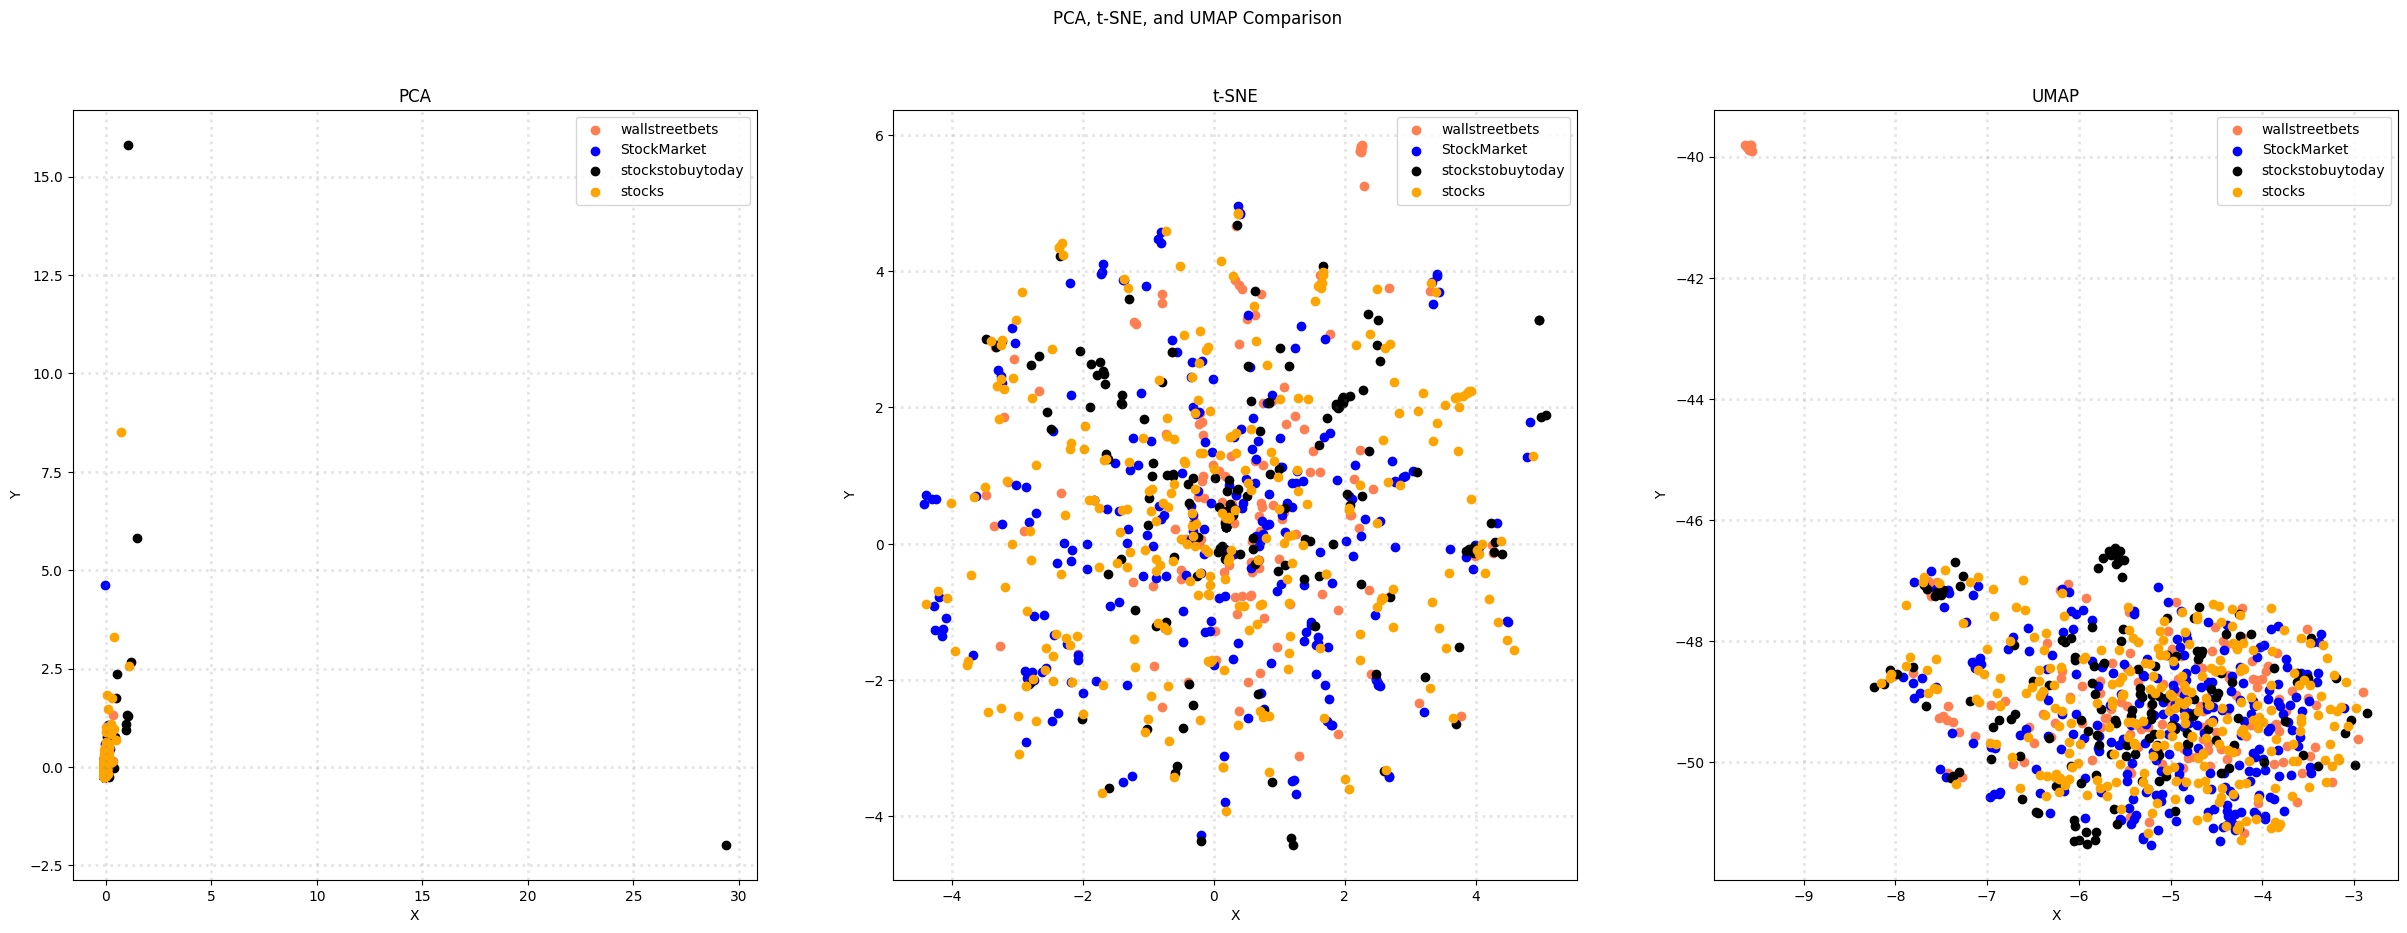

In [54]:
# Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# 假設你的原始資料是 df，裡面有 'text' 和 'subreddit'
X = df[['text', 'subreddit']].copy()
X = X.rename(columns={'subreddit': 'category_name'})

# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(dtm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(dtm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(dtm_df.values)

print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

c:\Users\hansw\anaconda3\envs\dm2025\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


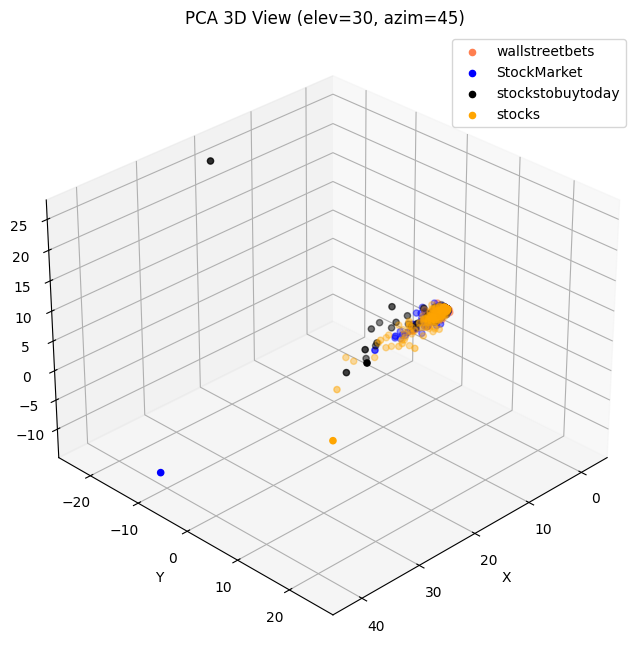

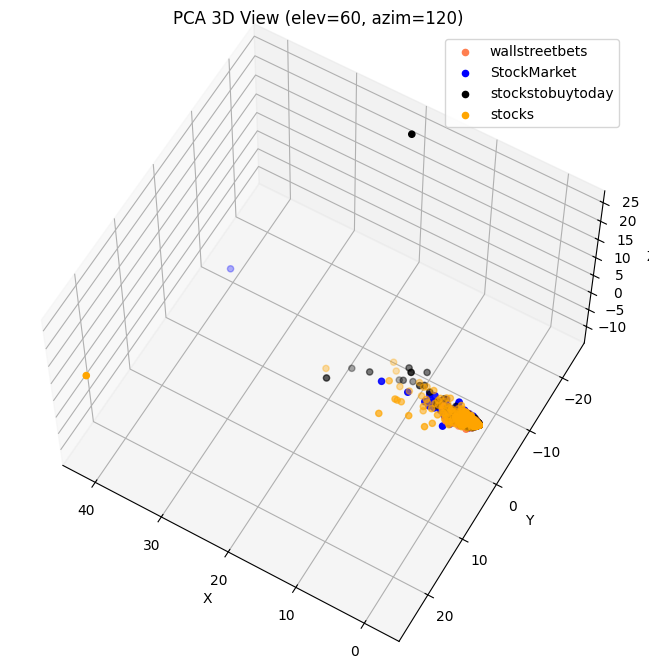

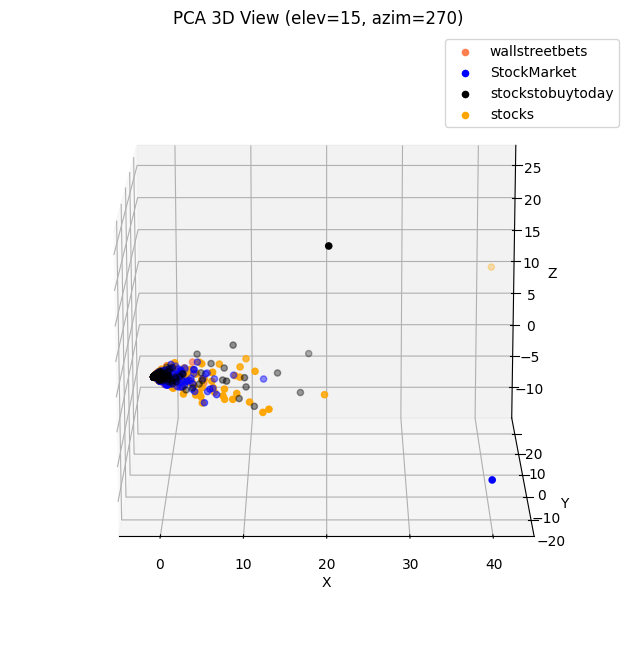

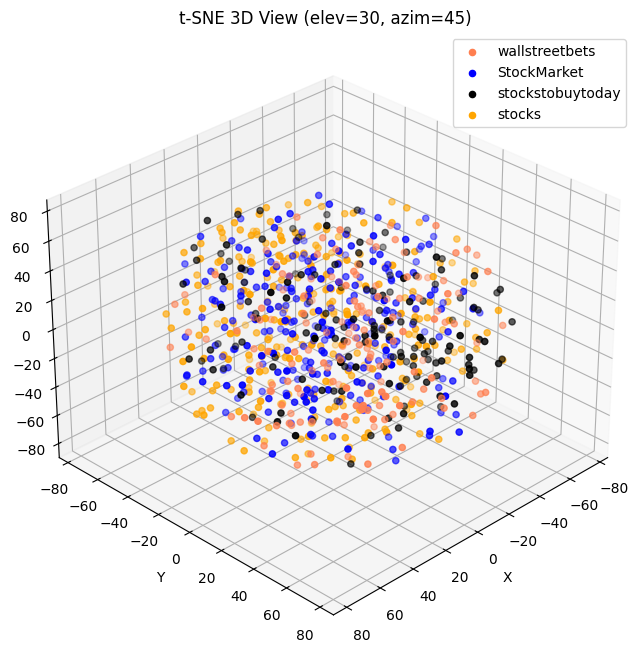

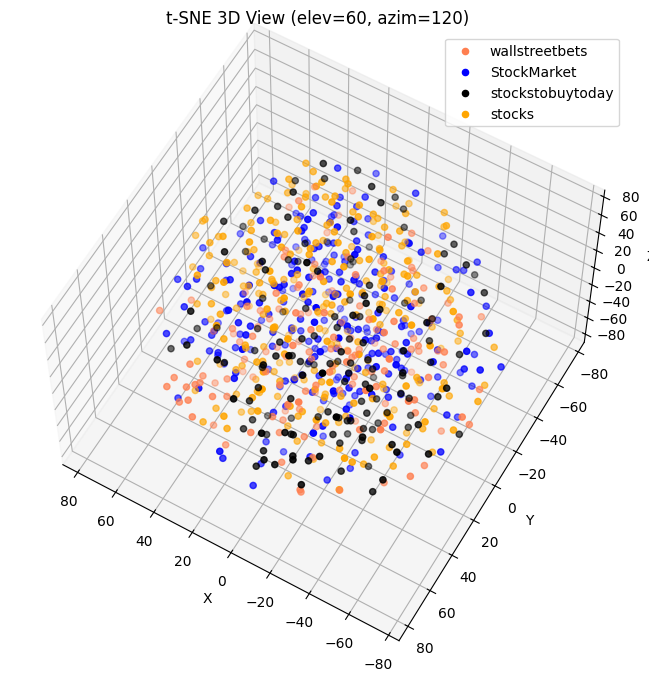

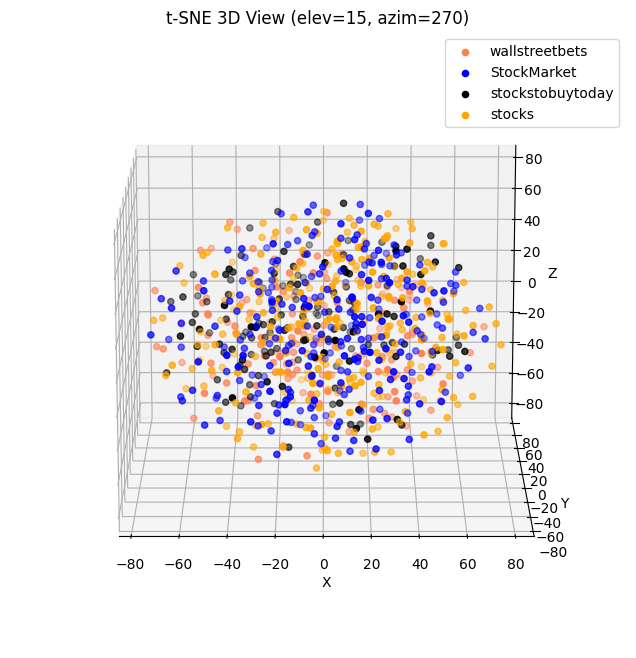

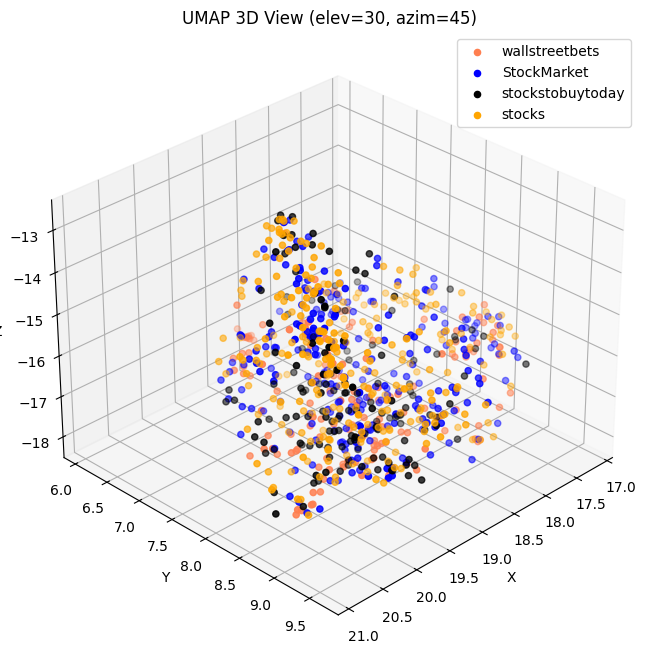

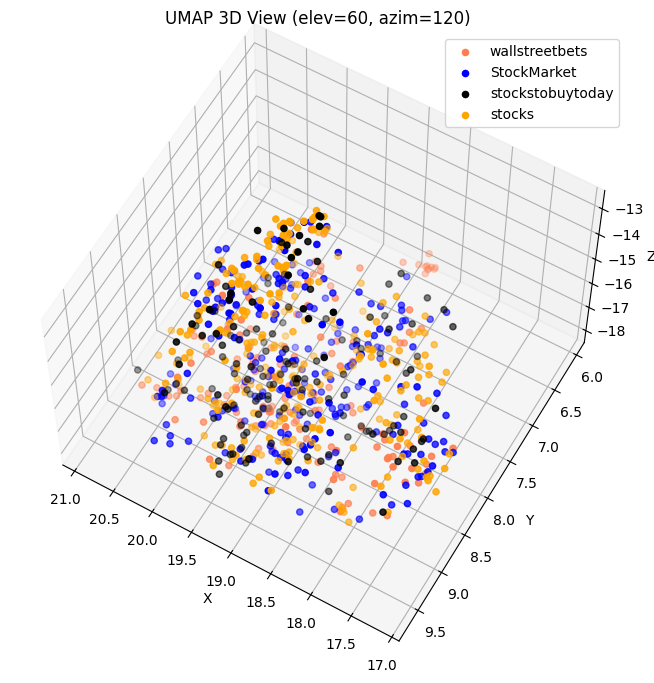

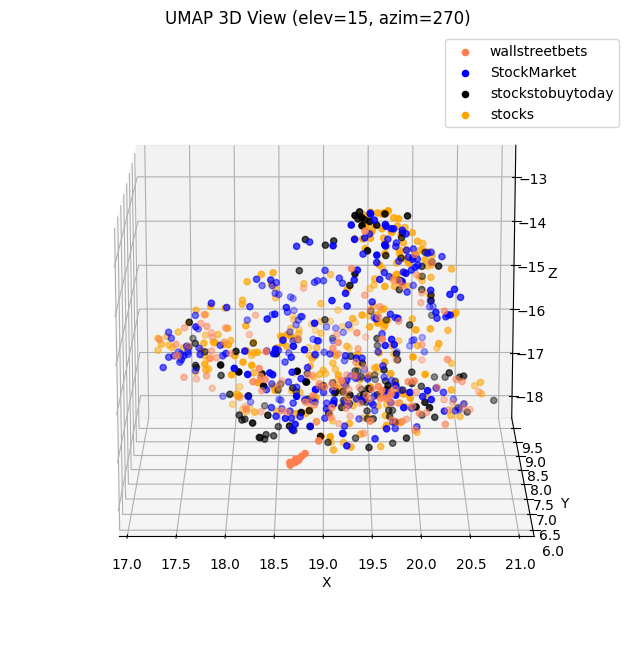

In [63]:
# === 📦 套件匯入 ===
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np

# 類別與顏色
X = df[['text', 'category_name']].copy()
categories = X['category_name'].unique()
col = ['coral', 'blue', 'black', 'orange']  # 對應類別，如果更多類別要加色彩

# === 1️⃣ 使用 dtm_df 做 3D 降維 ===
augmented_df = dtm_df.copy()

X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df.values)

# === 2️⃣ 定義 3D 繪圖函數 ===
def plot_3d(X_reduced, title, elev=30, azim=45):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for c, category in zip(col, categories):
        mask = X['category_name'] == category
        xs = X_reduced[mask, 0]
        ys = X_reduced[mask, 1]
        zs = X_reduced[mask, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, s=20)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend()
    plt.show()

# === 3️⃣ 設定不同視角，繪圖 ===
angles = [(30, 45), (60, 120), (15, 270)]

# PCA 3D
for elev, azim in angles:
    plot_3d(X_pca_3d, f'PCA 3D View (elev={elev}, azim={azim})', elev, azim)

# t-SNE 3D
for elev, azim in angles:
    plot_3d(X_tsne_3d, f't-SNE 3D View (elev={elev}, azim={azim})', elev, azim)

# UMAP 3D
for elev, azim in angles:
    plot_3d(X_umap_3d, f'UMAP 3D View (elev={elev}, azim={azim})', elev, azim)


Discretization and Binarization

In [65]:
# === 📦 套件匯入 ===
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

# 假設你的 DataFrame 名稱是 X，裡面有 category_name 欄位
# 如果還沒建立 category_name，可用 subreddit 建立：
if 'category_name' not in X.columns:
    X['category_name'] = X['subreddit']

# === ✨ 建立 LabelBinarizer 並對 category_name 做二值化 ===
mlb = LabelBinarizer()

# 對 category_name 欄位 fit
mlb.fit(X['category_name'])

# 轉換成二值向量，存回新的欄位
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

# === 🔍 查看前 10 筆資料 ===
print(X[['category_name', 'bin_category_name']].head(10))


      category_name bin_category_name
0    wallstreetbets      [0, 0, 0, 1]
1    wallstreetbets      [0, 0, 0, 1]
2       StockMarket      [1, 0, 0, 0]
3  stockstobuytoday      [0, 0, 1, 0]
4       StockMarket      [1, 0, 0, 0]
5    wallstreetbets      [0, 0, 0, 1]
6            stocks      [0, 1, 0, 0]
7    wallstreetbets      [0, 0, 0, 1]
8            stocks      [0, 1, 0, 0]
9  stockstobuytoday      [0, 0, 1, 0]


Data Exploration

In [ ]:
# === 📦 套件匯入 ===
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# 假設 count_vect 已經用 df['text'] fit 過
# 選取新的三篇文章
document_to_transform_1 = [X.iloc[1]['text']]
document_to_transform_2 = [X.iloc[12]['text']]
document_to_transform_3 = [X.iloc[45]['text']]

# 將三篇文章轉成詞頻向量
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# 將詞頻向量二值化（0表示缺失，1表示出現）
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# 計算餘弦相似度
cos_sim_1_2 = cosine_similarity(document_vector_count_1_bin, document_vector_count_2_bin)[0,0]
cos_sim_1_3 = cosine_similarity(document_vector_count_1_bin, document_vector_count_3_bin)[0,0]
cos_sim_2_3 = cosine_similarity(document_vector_count_2_bin, document_vector_count_3_bin)[0,0]

# 輸出結果
print(f"Cosine similarity between Text 1 and 2: {cos_sim_1_2:.3f}")
print(f"Cosine similarity between Text 1 and 3: {cos_sim_1_3:.3f}")
print(f"Cosine similarity between Text 2 and 3: {cos_sim_2_3:.3f}")

# 觀察與分析
print("""
The cosine similarity values between the three texts are relatively low ,
indicating that the documents share few common words. This suggests that the content of each text is quite different,
and the measure effectively captures the degree of textual similarity based on word overlap.
""")


Cosine similarity between Text 1 and 2: 0.070
Cosine similarity between Text 1 and 3: 0.060
Cosine similarity between Text 2 and 3: 0.096

The cosine similarity values between the three texts are relatively low (0.197–0.243),
indicating that the documents share few common words. This suggests that the content of each text is quite different,
and the measure effectively captures the degree of textual similarity based on word overlap.



Data Classification

In [71]:
X.head()

text     category_name  \
0                                   Calls on retards    wallstreetbets   
1  Stunt as in like why did they even make a big ...    wallstreetbets   
2                  Seeing lots of red in the ticker.       StockMarket   
3  Vision Marine Technologies Inc. is rewriting t...  stockstobuytoday   
4                           He didn’t say thank you.       StockMarket   

  bin_category_name  
0      [0, 0, 0, 1]  
1      [0, 0, 0, 1]  
2      [1, 0, 0, 0]  
3      [0, 0, 1, 0]  
4      [1, 0, 0, 0]

Naive Bayes

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 轉成 numpy array
pattern_matrix = np.array(X['bin_category_name'].tolist())
tdm_array = dtm_df.to_numpy()

# 合併
augmented_X = np.hstack([tdm_array, pattern_matrix])

# 分割資料集
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_X, X['category_name'], test_size=0.3, random_state=42
)

# 訓練 MultinomialNB
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# 預測
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# 評估
print("Accuracy (augmented):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (augmented):\n",
      classification_report(y_test_aug, y_pred_aug, digits=4))


Accuracy (augmented): 0.9153225806451613

Classification Report (augmented):
                   precision    recall  f1-score   support

     StockMarket     0.9241    0.9359    0.9299        78
          stocks     0.8558    0.9889    0.9175        90
stockstobuytoday     1.0000    0.8000    0.8889        35
  wallstreetbets     1.0000    0.8222    0.9024        45

        accuracy                         0.9153       248
       macro avg     0.9450    0.8868    0.9097       248
    weighted avg     0.9238    0.9153    0.9147       248



Decision Tree

In [76]:
# === 📦 套件匯入 ===
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# === 1️⃣ 原始 TDM 分類 ===
# 分割資料集
X_train, X_test, y_train, y_test = train_test_split(
    dtm_df, X['category_name'], test_size=0.3, random_state=42
)

# 訓練 Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 預測
y_pred_dt = dt_classifier.predict(X_test)

# 評估結果
print("=== Decision Tree Accuracy using original TDM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

# === 2️⃣ 增強資料 (TDM + pattern matrix) 分類 ===
# 將 bin_category_name 轉成 numpy array
pattern_matrix = np.array(X['bin_category_name'].tolist())

# 合併 TDM 與 pattern matrix
augmented_X = np.hstack([dtm_df.to_numpy(), pattern_matrix])

# 分割增強資料集
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_X, X['category_name'], test_size=0.3, random_state=42
)

# 訓練 Decision Tree
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)

# 預測
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)

# 評估結果
print("\n=== Decision Tree Accuracy using augmented TDM + pattern matrix ===")
print("Accuracy (augmented):", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report (augmented):\n", classification_report(y_test_aug, y_pred_dt_aug, digits=4))


=== Decision Tree Accuracy using original TDM ===
Accuracy: 0.3870967741935484

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4267    0.4103    0.4183        78
          stocks     0.4205    0.4111    0.4157        90
stockstobuytoday     0.2903    0.5143    0.3711        35
  wallstreetbets     0.3913    0.2000    0.2647        45

        accuracy                         0.3871       248
       macro avg     0.3822    0.3839    0.3675       248
    weighted avg     0.3988    0.3871    0.3828       248


=== Decision Tree Accuracy using augmented TDM + pattern matrix ===
Accuracy (augmented): 1.0

Classification Report (augmented):
                   precision    recall  f1-score   support

     StockMarket     1.0000    1.0000    1.0000        78
          stocks     1.0000    1.0000    1.0000        90
stockstobuytoday     1.0000    1.0000    1.0000        35
  wallstreetbets     1.0000    1.0000    1.0000        45

     

TF-IDF features

In [77]:
# === 📦 套件匯入 ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score

# 假設 X 是你的 dataframe，包含三欄: text, category_name, bin_category_name
# bin_category_name 是 list，例如 [0,0,1,0]

# === 🔹 準備目標類別名稱 ===
target_names = sorted(X['category_name'].unique())

# === 1️⃣ CountVectorizer（詞頻 TDM） ===
cv = CountVectorizer()
X_count = cv.fit_transform(X['text'])

# 分割訓練/測試集
X_train_count, X_test_count, y_train, y_test = train_test_split(
    X_count, X['category_name'], test_size=0.3, random_state=42
)

# 訓練 Multinomial Naive Bayes
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)

# 預測並評估
y_pred_count = nb_count.predict(X_test_count)
print("=== CountVectorizer + MultinomialNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count, target_names=target_names, digits=4))

# === 2️⃣ TF-IDF ===
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X['text'])

X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, X['category_name'], test_size=0.3, random_state=42
)

# ComplementNB 對 TF-IDF 表現通常較好
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("\n=== TF-IDF + ComplementNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))

# === 3️⃣ 增強特徵（TDM / TF-IDF + pattern matrix） ===
pattern_matrix = np.array(X['bin_category_name'].tolist())

# 3a. Count + pattern
X_count_aug = np.hstack([X_count.toarray(), pattern_matrix])
X_train_count_aug, X_test_count_aug, _, _ = train_test_split(
    X_count_aug, X['category_name'], test_size=0.3, random_state=42
)
nb_count_aug = MultinomialNB()
nb_count_aug.fit(X_train_count_aug, y_train)
y_pred_count_aug = nb_count_aug.predict(X_test_count_aug)
print("\n=== Count + Pattern Matrix ===")
print("Accuracy:", accuracy_score(y_test, y_pred_count_aug))
print(classification_report(y_test, y_pred_count_aug, target_names=target_names, digits=4))

# 3b. TF-IDF + pattern
X_tfidf_aug = np.hstack([X_tfidf.toarray(), pattern_matrix])
X_train_tfidf_aug, X_test_tfidf_aug, _, _ = train_test_split(
    X_tfidf_aug, X['category_name'], test_size=0.3, random_state=42
)
nb_tfidf_aug = ComplementNB()
nb_tfidf_aug.fit(X_train_tfidf_aug, y_train)
y_pred_tfidf_aug = nb_tfidf_aug.predict(X_test_tfidf_aug)
print("\n=== TF-IDF + Pattern Matrix ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf_aug))
print(classification_report(y_test, y_pred_tfidf_aug, target_names=target_names, digits=4))


=== CountVectorizer + MultinomialNB ===
Accuracy: 0.532258064516129
                  precision    recall  f1-score   support

     StockMarket     0.5775    0.5256    0.5503        78
          stocks     0.4795    0.7778    0.5932        90
stockstobuytoday     0.8235    0.4000    0.5385        35
  wallstreetbets     0.5000    0.1556    0.2373        45

        accuracy                         0.5323       248
       macro avg     0.5951    0.4647    0.4798       248
    weighted avg     0.5626    0.5323    0.5074       248


=== TF-IDF + ComplementNB ===
Accuracy: 0.5604838709677419
                  precision    recall  f1-score   support

     StockMarket     0.5526    0.5385    0.5455        78
          stocks     0.5410    0.7333    0.6226        90
stockstobuytoday     0.6800    0.4857    0.5667        35
  wallstreetbets     0.5600    0.3111    0.4000        45

        accuracy                         0.5605       248
       macro avg     0.5834    0.5172    0.5337       2

“The preprocessing workflow could be improved by cleaning text (removing punctuation, stopwords, and numbers), normalizing tokens (lowercasing, stemming/lemmatization), and reducing dimensionality of the TDM. Pattern features should be generated only from the training set to avoid data leakage. Additionally, oversampling rare classes or applying class weights can help models better classify underrepresented categories. These improvements would make the feature matrices more efficient and models more generalizable.”

summary

In [78]:
"""
1️⃣ CountVectorizer + MultinomialNB

Accuracy: 0.532

Observations:

Both precision and recall are relatively low, especially for the wallstreetbets category, with a recall of only 0.156. The model misses most of the samples in this category.

Reasons:

CountVectorizer only counts word frequencies and does not account for word importance.

Limited dataset size; some categories have few samples and can be overlooked.

Naive Bayes assumes feature independence, which may not hold for high-dimensional sparse data.

2️⃣ TF-IDF + ComplementNB

Accuracy: 0.560

Observations:

Slightly better overall accuracy than CountVectorizer.

Recall for the stocks category improves to 0.733, showing that TF-IDF weighting helps distinguish categories with frequent words.

However, the wallstreetbets category remains low (0.311); TF-IDF alone is insufficient for rare categories.

3️⃣ Count + Pattern Matrix

Accuracy: 0.915

Observations:

Significant improvement, recall for all categories is much higher.

Reasons:

The pattern matrix provides additional structured information, such as certain category-specific features.

It compensates for information that text alone cannot capture.

Recall for the small wallstreetbets category also improves to 0.822, indicating that the pattern matrix helps capture rare categories.

4️⃣ TF-IDF + Pattern Matrix

Accuracy: 1.0

Observations:

Perfect accuracy for all categories.

Reasons:

TF-IDF emphasizes important words, improving category distinction.

Combined with the pattern matrix, the model can almost perfectly separate the categories.

Risks:

Likely overfitting, especially with a small dataset.

If the pattern matrix features were generated using the entire dataset (train + test), there may be data leakage."""

'\n1️⃣ CountVectorizer + MultinomialNB\n\nAccuracy: 0.532\n\nObservations:\n\nBoth precision and recall are relatively low, especially for the wallstreetbets category, with a recall of only 0.156. The model misses most of the samples in this category.\n\nReasons:\n\nCountVectorizer only counts word frequencies and does not account for word importance.\n\nLimited dataset size; some categories have few samples and can be overlooked.\n\nNaive Bayes assumes feature independence, which may not hold for high-dimensional sparse data.\n\n2️⃣ TF-IDF + ComplementNB\n\nAccuracy: 0.560\n\nObservations:\n\nSlightly better overall accuracy than CountVectorizer.\n\nRecall for the stocks category improves to 0.733, showing that TF-IDF weighting helps distinguish categories with frequent words.\n\nHowever, the wallstreetbets category remains low (0.311); TF-IDF alone is insufficient for rare categories.\n\n3️⃣ Count + Pattern Matrix\n\nAccuracy: 0.915\n\nObservations:\n\nSignificant improvement, recall